# DS 241 Project 2024

## Group Members:
Tiaan Viviers $25070401$

Abraham de Villiers $26936844$

Lydia Laubscher $$

In [30]:
# import nessecary libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import chi2_contingency

In [4]:
#import data
df = pd.read_csv('../data/ShopAlot.csv')
#TODO: Delete previous line and uncomment this for submission
#df = pd.read_csv('ShopAlot.csv')

# Problem Statement

Give background on problem, discuss what we aim to do in this analysis and why it is important (impact).

List the variables we will be working with and what they mean/represent

# Exploratory Data Analysis

## TODO:
### Define Objectives
#### Objective: Clearly state the goals of the EDA. For instance, understanding what factors influence sales and identifying potential patterns in the data.

In [5]:
# retrieve basic information about dataset
print(f"Shape of the dataset: {df.shape}"); print()
df.info()

Shape of the dataset: (15000, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales            15000 non-null  float64
 1   Month            15000 non-null  object 
 2   AgeInMonths      15000 non-null  int64  
 3   ProfileInMonths  15000 non-null  int64  
 4   Subscribed       4065 non-null   object 
 5   NumPrevOrders    15000 non-null  int64  
 6   AvgSpend         15000 non-null  float64
 7   POSR             15000 non-null  float64
 8   OPR              15000 non-null  float64
 9   Online           15000 non-null  int64  
 10  Discount         15000 non-null  int64  
 11  ShippingOption   15000 non-null  object 
 12  Platform         15000 non-null  object 
 13  Payment          15000 non-null  object 
 14  Ad_1             15000 non-null  object 
 15  Ad_2             15000 non-null  object 
 16  Ad_3             15000 

Dataset has contains 15000 values for each column, except for 'Subscribed' and 'SocialMedia' which have missing values.

Dataset contains 9 Numerical variables, 13 Categorical Variables.

In [6]:
df.describe()

,Sales,AgeInMonths,ProfileInMonths,NumPrevOrders,AvgSpend,POSR,OPR,Online,Discount
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,955.672704,445.602267,26.489067,25.113467,703.972242,4.463153,0.655693,48.325400,3.745533
std,357.645815,60.034260,17.434851,16.210000,229.975235,2.138663,0.251812,15.829107,10.009002
min,448.180000,300.000000,0.000000,0.000000,263.800000,0.000000,0.000000,10.000000,0.000000
25%,737.195000,401.000000,13.000000,11.000000,545.975000,2.800000,0.560000,37.000000,0.000000
50%,869.075000,441.000000,26.000000,26.000000,660.710000,4.700000,0.690000,46.000000,0.000000
75%,1069.317500,491.000000,39.000000,36.000000,815.317500,6.200000,0.830000,58.000000,0.000000
max,5099.040000,609.000000,111.000000,72.000000,2847.860000,8.000000,1.000000,134.000000,45.000000


## Add short description of the describe() method here? here maybe?

## Discuss / Investigate Missing Values:

Decide on strategies for handling missing values (drop, fill, or impute).

Justify your choice based on the importance and proportion of missing data.

Only apply changes in preprocessing section.


In [7]:
# Investigate missing values
df.isnull().sum()

Sales                  0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed         10935
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount               0
ShippingOption         0
Platform               0
Payment                0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia         9050
ShippingPayment        0
Category               0
DayOfWeek              0
Province               0
dtype: int64

#  Univariate Analysis
## Numerical Variables:

Visualize distributions using histograms or box plots.
Highlight key statistics like mean, median, and variance to understand data spread and central tendency.
You can add the key informations on the plots as labels.

Do a big interpretation for all numerical variables.

## Categorical Variables:

Visualize the frequency of each category using bar plots.
Identify any skewness or imbalance in the categories.

Do a big interpretation for all categorical variables.

"less is more" moet asb nie elke variable op sy eie plot nie

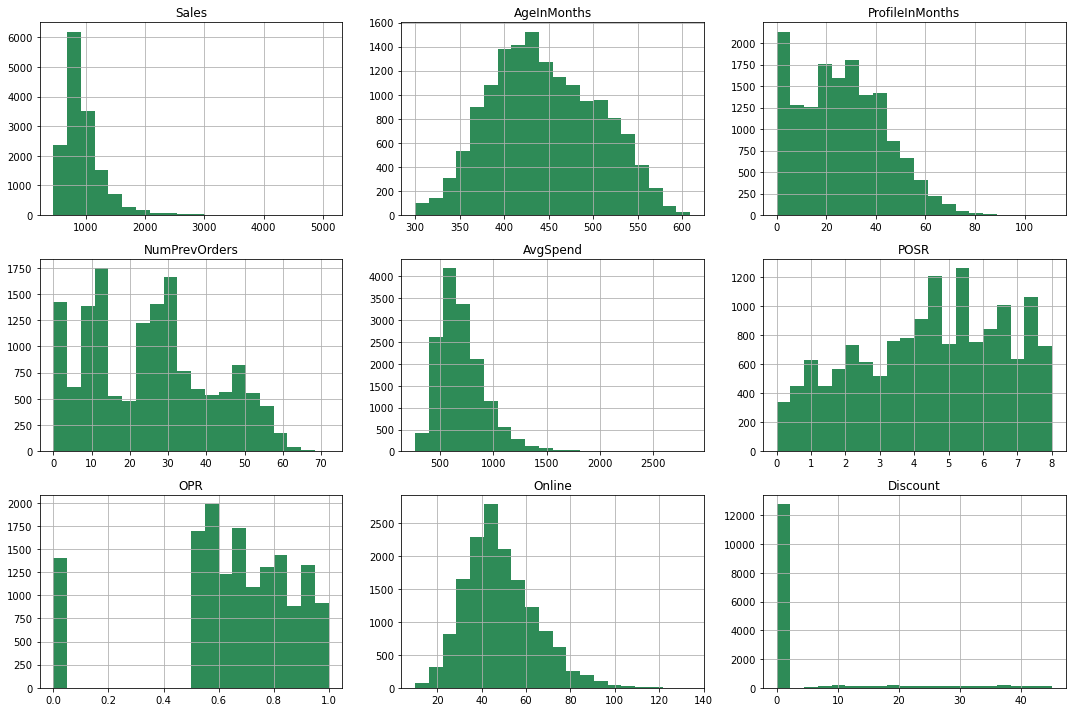

In [8]:
# Visualize distribution of numerical variables
df.hist(bins=20, figsize=(15,10), color='seagreen')
plt.tight_layout()
plt.show()

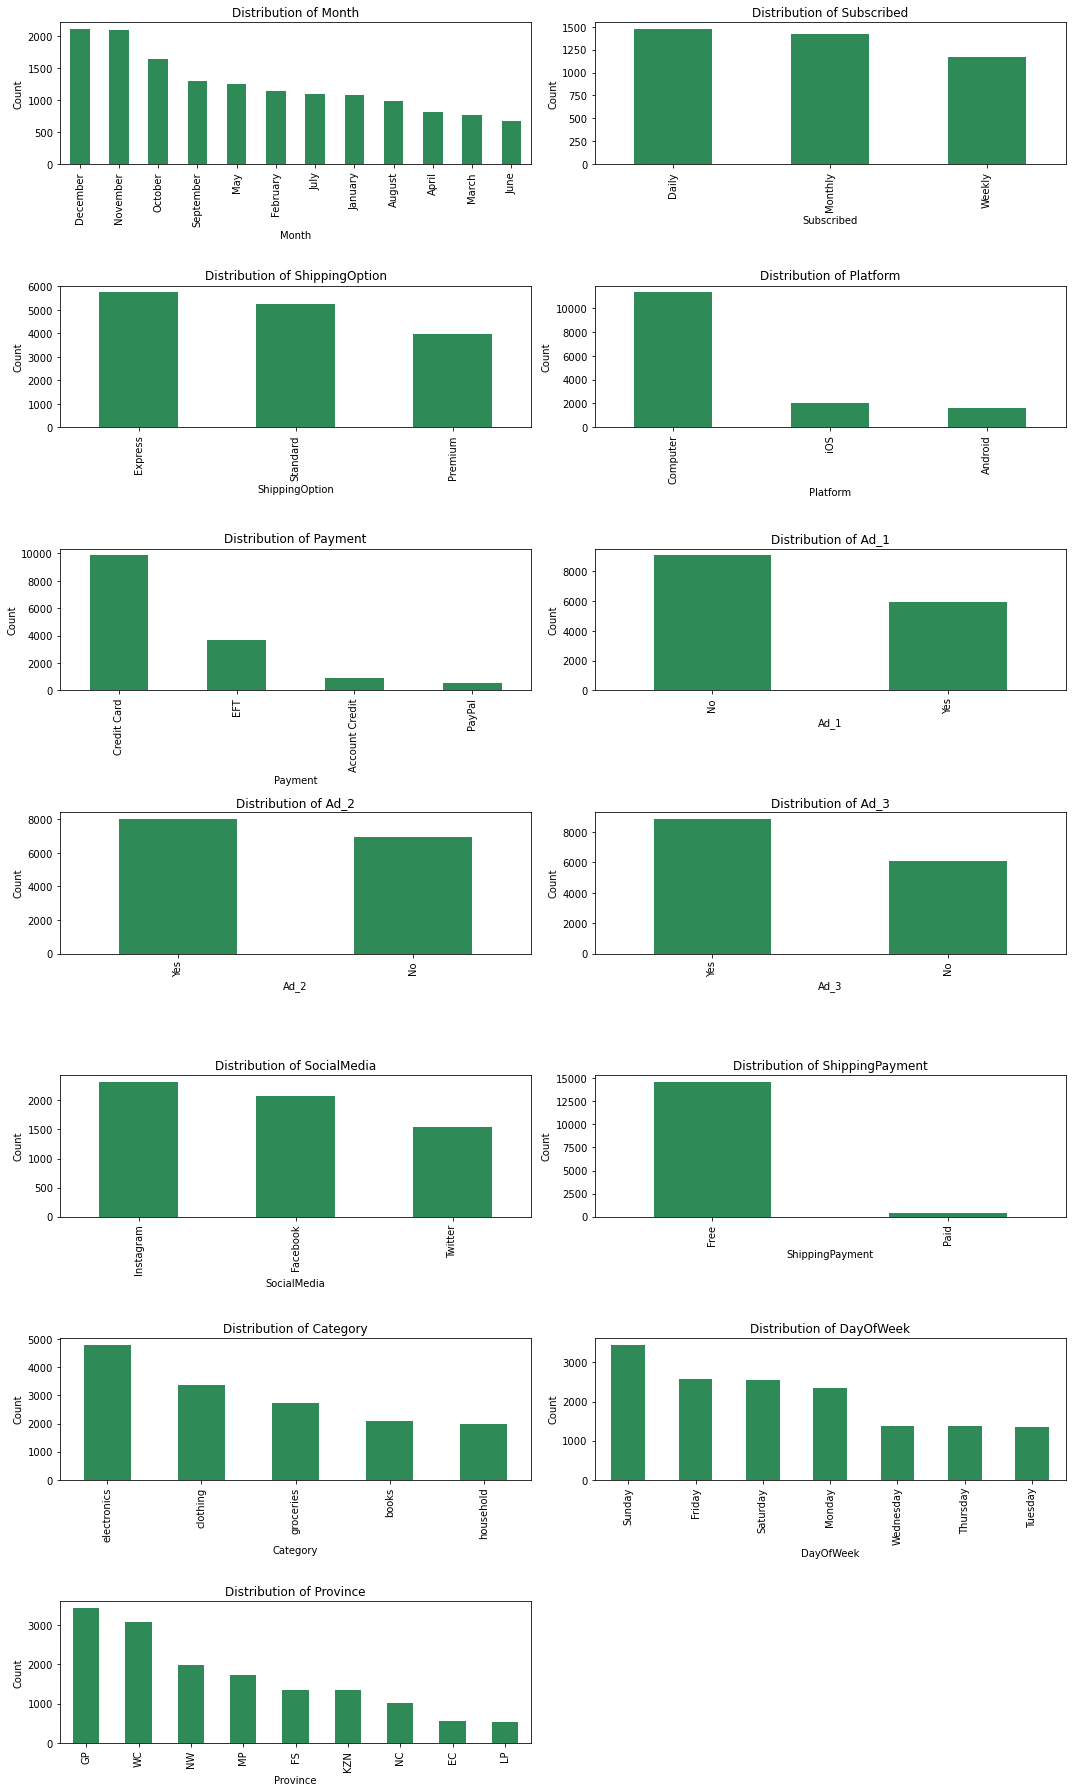

In [9]:
# Visualize distribution of categorical variables
categorical_columns = ['Month', 'Subscribed', 'ShippingOption', 'Platform', 'Payment', 
                       'Ad_1', 'Ad_2', 'Ad_3', 'SocialMedia', 'ShippingPayment', 
                       'Category', 'DayOfWeek', 'Province']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='seagreen')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Multivariate Analysis
### Pairwise Relationships:

Use pair plots or multivariate scatter plots to explore interactions between multiple variables.
Consider dimensionality reduction techniques like PCA if dealing with high-dimensional data.

### Interactions

Identify potential interactions between variables that might be important for modeling.

## Summary of EDA Findings
### Key Insights:
Summarize the main insights discovered during the EDA in bullet points.

Highlight any surprising patterns or relationships that will inform further modeling

# Data Preporcessing

# Step 1: Data Cleaning
## Handle Missing Values:

### Numerical Variables:

Impute missing values with the mean, median, or a value based on domain knowledge.
Option: Use more sophisticated methods like KNN imputation.


### Categorical Variables:

Impute missing values with the mode or a placeholder like 'Unknown'.
Justification: Maintaining as much data as possible while acknowledging the missing information.

# Step 2:
## Outlier Detection and Treatment:

Identify outliers using techniques like IQR or Z-score.

Decide whether to remove or transform outliers based on their impact on the analysis.



# Step 3:
## Dummy Variable encoding

# Step 4:
## Feature Engineering
### Interaction Terms:

Create interaction terms between features that may have a combined effect (e.g., Discount and Category).

Justification: Captures non-linear relationships between features.

### Transformations:

Apply transformations to skewed variables (e.g., log transformation on Sales if highly skewed).

Justification: Reduces skewness and brings the data closer to a normal distribution.

# Step 5: Split the Data into Training and Validation Sets
## Partitioning the Data:

Typically use a 70-30 or 80-20 split for training and validation.
Use stratified sampling if the target variable is categorical to maintain class distribution.

## Shuffling and Randomization:
Shuffle the data before splitting to ensure randomness.

# Step 6: Document the Data Processing Steps
## Summarize Changes:

Document every change you made to the dataset, including handling missing values, encoding, transformations, and feature scaling.
Justification: Transparency and reproducibility of the preprocessing pipeline.

### Motivate Choices:
Provide clear explanations and justifications for each preprocessing step, focusing on its impact on the model’s performance and interpretability.


@lydia van hier af moet nie enige functionality verander nie maar jy kan cleanup en goed skryf of dit netjies maak

subsrcibed raak n dummy, die NA values raak dan irrelevant
shippingoption is dieselfde
platform dieselfde 
payment dieselfde
social media dieselfde
shippingpayment dieselfde
dayofweek dieselfde
province dieselfde

category maybe

months word in seasonally gegroup

tans is die train-test split 25-75 as iemand iets daar wil change is julle baie welkom of research of dit even goed is

alle usefull categorical data changed na dummy vir regression

In [10]:
dummies = pd.get_dummies(
    df,
    columns=['Subscribed',
             'ShippingOption',
             'Platform',
             'Payment',
             'Ad_1',
             'Ad_2',
             'Ad_3',
             'SocialMedia',
             'ShippingPayment',
             'Category',
             'DayOfWeek',
             'Province'],
    drop_first=True
    )

In [11]:
season_mapping = {
    'January': 'Summer',
    'February': 'Summer',
    'March': 'Autumn',
    'April': 'Autumn',
    'May': 'Autumn',
    'June': 'Winter',
    'July': 'Winter',
    'August': 'Winter',
    'September': 'Spring',
    'October': 'Spring',
    'November': 'Spring',
    'December': 'Summer'
}

dummies['Season'] = dummies['Month'].map(season_mapping)

season_dummies = pd.get_dummies(dummies['Season'])

dummies = pd.concat([dummies, season_dummies], axis=1)

dummies.drop(['Month', 'Season'], axis=1, inplace=True)

In [12]:
dummies[dummies.select_dtypes(include='bool').columns] \
= dummies.select_dtypes(include='bool').astype(int)


# Linear regression analysis

### Variable setup and train test split

In [13]:
x = dummies.drop(columns=['Sales'])
y = dummies['Sales']

x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.25, random_state=42)

### Initial model build (ordinary least squares)

In [14]:
x_train_sm = sm.add_constant(x_train)
initial_model = sm.OLS(y_train, x_train_sm).fit()

print(initial_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     548.3
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:41:11   Log-Likelihood:                -75638.
No. Observations:               11250   AIC:                         1.514e+05
Df Residuals:                   11205   BIC:                         1.517e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Forward stepwise selection

In [35]:
def fss(x, y, significance_lvl=0.05):
    initial_features = x.columns.tolist()
    selected_features = []
    r_squared_values = []
    mse_values = []
    
    while len(initial_features) > 0:
        pvals = pd.Series(index=initial_features)
        
        for feature in initial_features:
            model = sm.OLS(y, sm.add_constant(x[selected_features + [feature]])).fit()
            pvals[feature] = model.pvalues[feature]
            
        best_feature = pvals.idxmin()
        best_pvalue = pvals.min()
        
        if best_pvalue < significance_lvl:
            selected_features.append(best_feature)    
            initial_features.remove(best_feature)
            
            r_squared_values.append(model.rsquared)
            
            predictions = model.predict(sm.add_constant(x[selected_features]))
            mse = mean_squared_error(y, predictions)
            mse_values.append(mse)            
            print(f"Selected {best_feature} with p-value {best_pvalue}")
        else:
            # no improvements can be made to model
            break
    
    r_squared_values = r_squared_values[1:]
    mse_values = mse_values[1:]
    
    # Plotting R² and MSE
    plt.figure(figsize=(12, 6))
    
    # R² Plot
    plt.subplot(2, 1, 1)
    plt.plot(range(1, len(r_squared_values) + 1), r_squared_values, marker='o', color='blue', label='R² Value')
    plt.title('R² Value vs. Number of Variables Added')
    plt.xlabel('Number of Variables')
    plt.ylabel('R² Value')
    plt.xticks(range(1, len(r_squared_values) + 1))
    plt.grid()
    plt.legend()

    # MSE Plot
    plt.subplot(2, 1, 2)
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', color='red', label='Mean Squared Error')
    plt.title('Mean Squared Error vs. Number of Variables Added')
    plt.xlabel('Number of Variables')
    plt.ylabel('Mean Squared Error')
    plt.xticks(range(1, len(mse_values) + 1))
    plt.grid()
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    return selected_features

Selected AvgSpend with p-value 0.0
Selected Ad_2_Yes with p-value 3.664797045841133e-110
Selected Ad_3_Yes with p-value 2.89768237210918e-128
Selected OPR with p-value 1.2292897433873062e-119
Selected Category_electronics with p-value 6.235437428708495e-64
Selected Ad_1_Yes with p-value 1.6935985280327643e-55
Selected AgeInMonths with p-value 4.3585453818663775e-35
Selected POSR with p-value 2.8707150637533853e-19
Selected ProfileInMonths with p-value 2.6343346708953856e-12
Selected Online with p-value 4.772173814015716e-09
Selected ShippingOption_Premium with p-value 0.001397544270930796
Selected Payment_PayPal with p-value 0.007895052944464076
Selected Province_FS with p-value 0.03903635610913415
Selected Province_NC with p-value 0.02466692024777356
Selected Discount with p-value 0.04471975869062661
Selected Subscribed_Weekly with p-value 0.04558133513257548


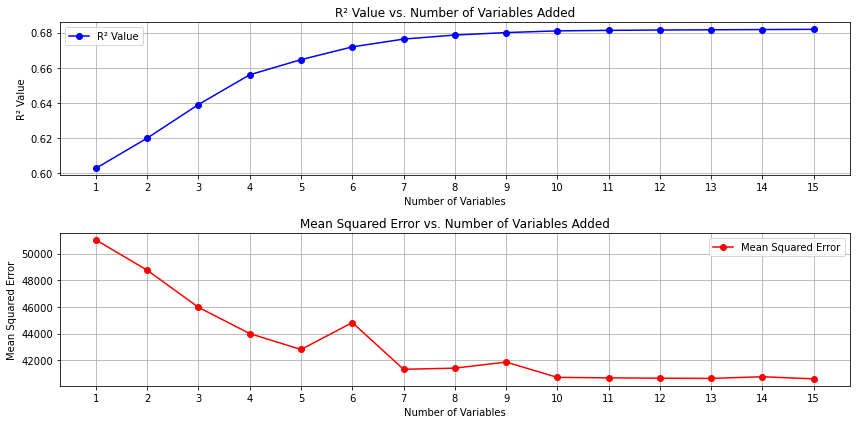

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1505.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:01:17   Log-Likelihood:                -75653.
No. Observations:               11250   AIC:                         1.513e+05
Df Residuals:                   11233   BIC:                         1.515e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [36]:
selected_features_fss = fss(x_train, y_train)

fss_model = sm.OLS(y_train, sm.add_constant(x_train[selected_features_fss])).fit()

print(fss_model.summary())

#### TESTING RESIDUALS OF FSS

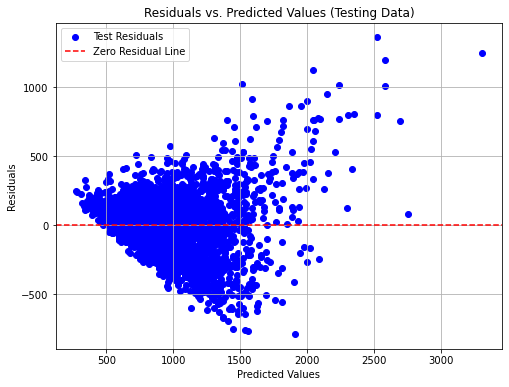

In [17]:
y_pred_test = fss_model.predict(sm.add_constant(x_test[selected_features_fss]))
test_residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, test_residuals, color='blue', label='Test Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')  # Horizontal line at y=0
plt.title('Residuals vs. Predicted Values (Testing Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

### Backward stepwise selection

In [38]:
def bss(x, y, significance_lvl=0.05):
    selected_features = x.columns.tolist()

    while len(selected_features) > 0:
        model = sm.OLS(y, sm.add_constant(x[selected_features])).fit()
        pvals = model.pvalues.iloc[1:]  # Exclude the constant
        worst_feature = pvals.idxmax()
        worst_pvalue = pvals.max()
        
        if worst_pvalue > significance_lvl:
            selected_features.remove(worst_feature)
            print(f"Removed {worst_feature} with p-value {worst_pvalue}")
        else:
            break
    
    return selected_features

In [39]:
selected_features_bss = bss(x_train, y_train)

bss_model = sm.OLS(y_train, sm.add_constant(x_train[selected_features_bss])).fit()

print(bss_model.summary())

Removed Subscribed_Monthly with p-value 0.9937113794500958
Removed Platform_Computer with p-value 0.9045047488572975
Removed Province_LP with p-value 0.8741931437368048
Removed NumPrevOrders with p-value 0.8382138755031552
Removed DayOfWeek_Thursday with p-value 0.8015112288557256
Removed ShippingOption_Standard with p-value 0.7241605305882703
Removed Autumn with p-value 0.6668311136778629
Removed Summer with p-value 0.9972202104565301
Removed Winter with p-value 0.8400748738543617
Removed Province_MP with p-value 0.6430327036691058
Removed Province_KZN with p-value 0.7763306419048794
Removed ShippingPayment_Paid with p-value 0.6282294928738655
Removed DayOfWeek_Saturday with p-value 0.4745651510822686
Removed DayOfWeek_Monday with p-value 0.5110452596544947
Removed DayOfWeek_Sunday with p-value 0.49901940542087586
Removed Category_clothing with p-value 0.36429162158318784
Removed Province_GP with p-value 0.3586286584359929
Removed SocialMedia_Twitter with p-value 0.3210585953270929
Re

### Summary Comparison of 3 OLS Models

#### 1. **Full Model**
- **R-squared**: 0.683
- **Adjusted R-squared**: 0.682
- **F-statistic**: 548.3
- **AIC**: 151400
- **BIC**: 151700
- **Number of Predictors (Df Model)**: 44
- **Log-Likelihood**: -75638

The full model includes all **44 predictors** and explains 68.3% of the variance in sales (R-squared). The **AIC** and **BIC** are the highest of all the models, indicating that the complexity of the model may not be justified by significantly better performance.

#### 2. **Forward Stepwise Selection**
- **R-squared**: 0.682
- **Adjusted R-squared**: 0.682
- **F-statistic**: 1505
- **AIC**: 151300
- **BIC**: 151500
- **Number of Predictors (Df Model)**: 16
- **Log-Likelihood**: -75653

The forward stepwise model retains **16 predictors**, resulting in an R-squared of **0.682**, very similar to the full model. The model has slightly better **AIC (151300)** and **BIC (151500)** values, indicating improved performance with fewer predictors. The high F-statistic (**1505**) suggests that the retained variables are highly significant.

#### 3. **Backward Stepwise Selection**
- **R-squared**: 0.682
- **Adjusted R-squared**: 0.682
- **F-statistic**: 1417
- **AIC**: 151300
- **BIC**: 151500
- **Number of Predictors (Df Model)**: 17
- **Log-Likelihood**: -75652

The backward stepwise model includes **17 predictors** and performs similarly to the forward stepwise model, with the same **R-squared (0.682)** and comparable AIC and BIC values. The **F-statistic (1417)** is slightly lower than that of the forward stepwise model, but both models show highly significant predictors.

### Conclusion
- **Full Model**: The full model has a marginally higher R-squared (0.683) but includes 44 predictors, making it the most complex and resulting in the highest AIC and BIC values.
- **Forward Stepwise**: This model reduces the number of predictors to **16**, while maintaining nearly the same R-squared of 0.682. It shows the best F-statistic, AIC, and BIC, suggesting that it strikes the best balance between model simplicity and performance.
- **Backward Stepwise**: This model retains **17 predictors** and offers nearly identical performance to the forward stepwise model, but with one additional variable and a slightly lower F-statistic.

Both the forward and backward stepwise models offer more efficient models with fewer predictors, and they should be preferred over the full model. The forward stepwise model has a slight edge in terms of performance metrics.

## Significant variables

So far we can consider the following variables as significant since forward stepwise selection yielded the best result:

In [20]:
for var in selected_features_fss:
    print(var)

AvgSpend
Ad_2_Yes
Ad_3_Yes
OPR
Category_electronics
Ad_1_Yes
AgeInMonths
POSR
ProfileInMonths
Online
ShippingOption_Premium
Payment_PayPal
Province_FS
Province_NC
Discount
Subscribed_Weekly


## Polynomial Regression

In [25]:
x_train_significant = x_train[selected_features_fss]
x_test_significant = x_test[selected_features_fss]

Degree: 1 
| Train MSE: 40600.6357 | Test MSE: 40906.2223 
| Train R²: 0.6820 | Test R²: 0.6818

Degree: 2 
| Train MSE: 17283.8666 | Test MSE: 16743.9937 
| Train R²: 0.8646 | Test R²: 0.8698

Degree: 3 
| Train MSE: 13712.9568 | Test MSE: 15655.9693 
| Train R²: 0.8926 | Test R²: 0.8782

Degree: 4 
| Train MSE: 10000.5098 | Test MSE: 346819.4794 
| Train R²: 0.9217 | Test R²: -1.6975



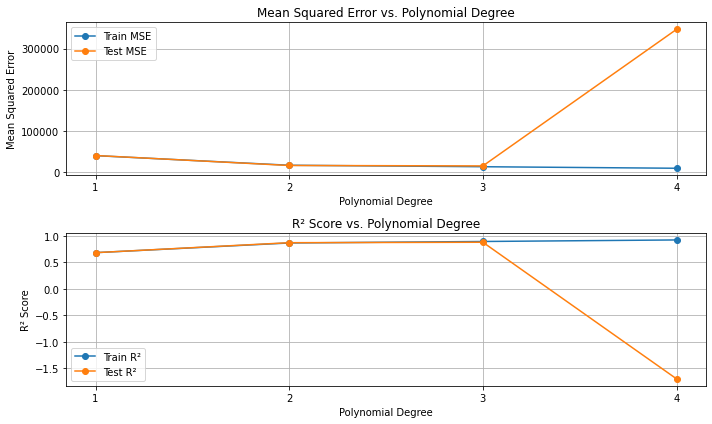

In [41]:
# Evaluate polynomial regression for different degrees
degrees = [1, 2, 3, 4]
train_errors = []
test_errors = []
train_r2_scores = []
test_r2_scores = []

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train_significant)
    x_test_poly = poly.transform(x_test_significant)

    # Fit the model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predict
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f'Degree: {degree} \n| Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} \n| Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}\n')

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(degrees, train_errors, marker='o', label='Train MSE')
plt.plot(degrees, test_errors, marker='o', label='Test MSE')
plt.title('Mean Squared Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.grid()
plt.legend()

# Plotting R² Scores
plt.subplot(2, 1, 2)
plt.plot(degrees, train_r2_scores, marker='o', label='Train R²')
plt.plot(degrees, test_r2_scores, marker='o', label='Test R²')
plt.title('R² Score vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.xticks(degrees)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [433]:
selected_features_fss.append('Sales')
df_significant = dummies[selected_features_fss].copy()

We will now examine potential methods to enhance this model, which may involve adding new features or eliminating some from the existing list.

First, we will assess **AvgSpend** and **Online** for skewness. If either variable shows significant skewness, we will include their log-transformed versions in the list of significant variables and remove the original skewed versions.

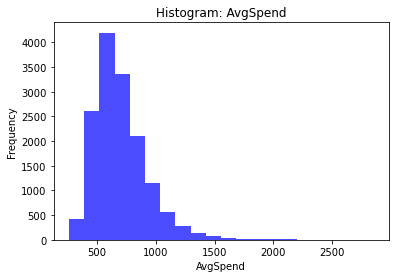

In [434]:
avgspend_col = df_significant['AvgSpend'].to_numpy()
plt.hist(avgspend_col, bins=20, color='blue', alpha=0.7)
plt.title('Histogram: AvgSpend')
plt.xlabel('AvgSpend')
plt.ylabel('Frequency')
plt.show()

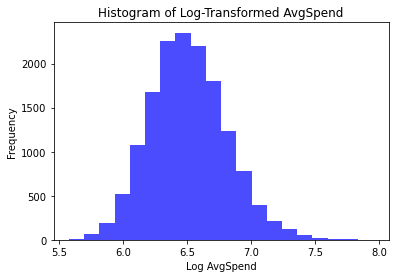

In [435]:
df_significant.loc[:, 'log_AvgSpend'] = np.log(df_significant['AvgSpend'] + 1)

avgspendlog_col = df_significant['log_AvgSpend'].to_numpy()
plt.hist(avgspendlog_col, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Log-Transformed AvgSpend')
plt.xlabel('Log AvgSpend')
plt.ylabel('Frequency')
plt.show()

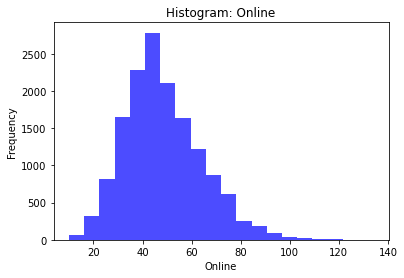

In [436]:
Online_col = df_significant['Online'].to_numpy()
plt.hist(Online_col, bins=20, color='blue', alpha=0.7)
plt.title('Histogram: Online')
plt.xlabel('Online')
plt.ylabel('Frequency')
plt.show()

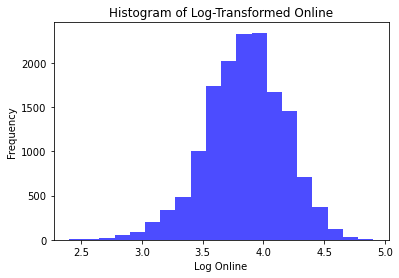

In [437]:
df_significant.loc[:, 'log_Online'] = np.log(df_significant['Online'] + 1)

log_Online = df_significant['log_Online'].to_numpy()
plt.hist(log_Online, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Log-Transformed Online')
plt.xlabel('Log Online')
plt.ylabel('Frequency')
plt.show()

### REVIEW
TODO
after testing it does not improve the model to transform those 2 vars

In [439]:
df_significant.drop(columns=['log_AvgSpend', 'log_Online'], inplace=True)

## Checking for Multicollinearity

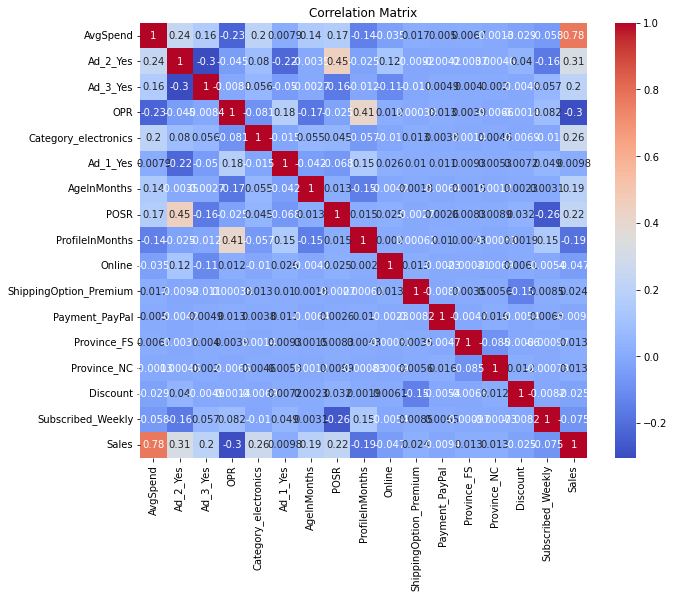

In [441]:
corr_matrix = df_significant.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [442]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X = df_significant.drop(columns=['Sales'])
vif_data = calculate_vif(X)
print(vif_data)

                   feature        VIF
0                 AvgSpend  12.620707
1                 Ad_2_Yes   3.394364
2                 Ad_3_Yes   2.932676
3                      OPR   8.767398
4     Category_electronics   1.542758
5                 Ad_1_Yes   1.887472
6              AgeInMonths  22.748887
7                     POSR   6.946994
8          ProfileInMonths   4.070272
9                   Online   9.504151
10  ShippingOption_Premium   1.388916
11          Payment_PayPal   1.039717
12             Province_FS   1.106503
13             Province_NC   1.080861
14                Discount   1.167545
15       Subscribed_Weekly   1.199101


The VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A higher VIF indicates more severe multicollinearity.
We can see
- AvgSpend
- AgeInMonths
- OPR
- Online
All have high VIF 

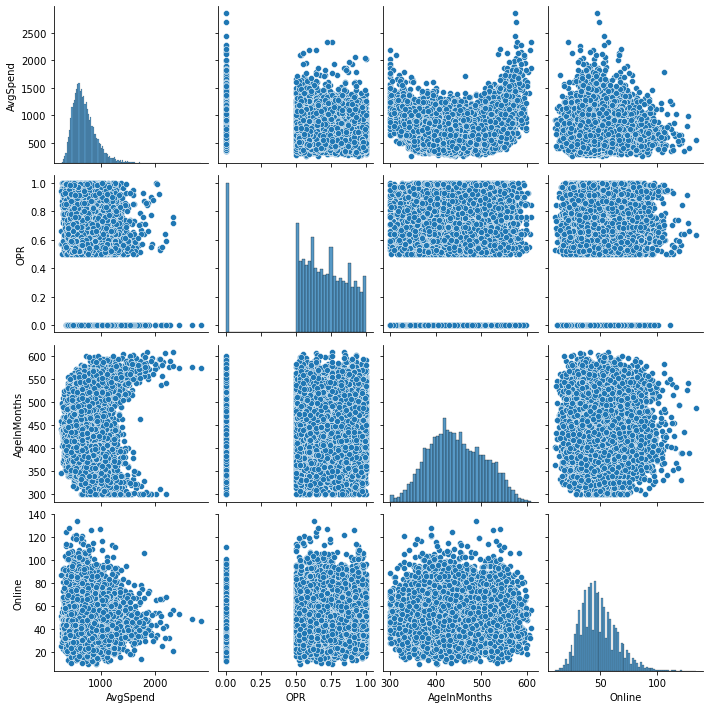

In [445]:
df_high_vif = df_significant[['AvgSpend', 'OPR', 'AgeInMonths', 'Online']]
sns.pairplot(df_high_vif)

plt.show()